In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

In [45]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [46]:
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
data.describe()
#Upon first glance, the mean survival rate is 38.38%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
#Those who survived were younger in age and paid higher fares (wealthier)
data.groupby('Survived').agg('sum')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,245412,1390,12985.50,304,181,12142.7199
1,151974,667,8219.67,162,159,16551.2294


In [49]:
data.groupby('Gender').agg('sum')
#More female survived than men

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Gender,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


In [50]:
data['Died'] = list(map(lambda num:num-1, data['Survived']))
data['Died'] = data['Died']*-1
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


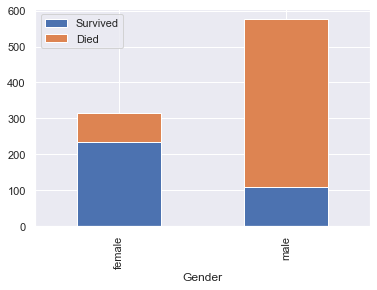

In [51]:
#Now we can see stacked values in bar plot of ratio of deaths of both Genders
data.groupby('Gender').agg('sum')[['Survived','Died']].plot(kind='bar',stacked = True)

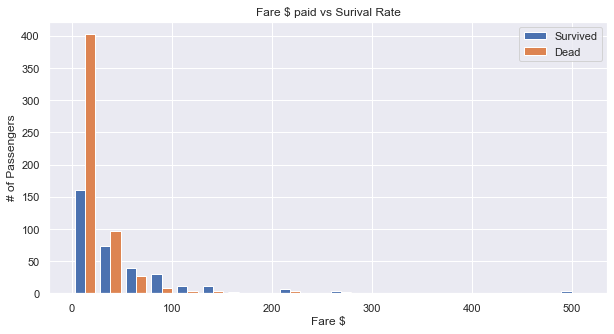

In [52]:
#Now let's try histogram of "Fare $ paid vs Surival Rate"
figure = plt.figure(figsize=(10,5))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], label=['Survived','Dead'], bins = 20)
plt.title('Fare $ paid vs Surival Rate')
plt.xlabel('Fare $')
plt.ylabel('# of Passengers')
plt.legend()

## Feature Engineering
### We can create new features (indepn variables) to find new correlations
### Putting siblings and parents data into family can tell us if larger families have a higher survival rate or not

In [53]:
#People's titles also affec thteir survival rates
#Create a dictionary to categorize each title

title_dict = {
    "Capt": "Officer",
    "Col": 'Officer',
    'Major': 'Officer',
    'Jonkheer': 'Royalty',
    'Don': 'Royalty',
    'Sir' : 'Royalty',
    'Dr':'Officer',
    'Rev':'Officer',
    'the Countess': 'Royalty',
    'Mme': 'Mrs',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Officer',
    'Lady': 'Royalty'
}
data['name_title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
data['name_title'] = data.name_title.map(title_dict)

In [54]:
#Moved the columns next to name for demostration purposes
data.insert(4, 'Title', data['name_title'])
data

,PassengerId,Survived,Pclass,Name,Title,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,name_title
0,1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Officer,male,27.0,0,0,211536,13.0000,NaN,S,1,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",Mr,male,26.0,0,0,111369,30.0000,C148,C,0,Mr


In [55]:
#Now need to separate age groups by Gender, pclass, and title too then get average age from this groups
#to fill in missing values, NaN spaces
data = data.drop(['name_title'], axis =1)

In [59]:
#Create new dataframe for new groups
grouped_for_age = data.groupby(['Gender', 'Pclass', 'Title'])
grouped_for_age

In [60]:
grouped_for_age_median = grouped_for_age.median()
grouped_for_age_median

PassengerId  Survived   Age  SibSp  Parch      Fare  \
Gender Pclass Title                                                          
female 1      Miss           369.0       1.0  30.0    0.0    0.0  88.25000   
              Mrs            499.0       1.0  40.0    1.0    0.0  79.20000   
              Officer        797.0       1.0  49.0    0.0    0.0  25.92920   
              Royalty        658.5       1.0  40.5    0.5    0.0  63.05000   
       2      Miss           437.5       1.0  24.0    0.0    0.0  13.00000   
              Mrs            439.5       1.0  31.5    1.0    0.0  26.00000   
       3      Miss           372.0       0.5  18.0    0.0    0.0   8.75625   
              Mrs            405.5       0.5  31.0    1.0    1.0  15.97500   
male   1      Mr             463.0       0.0  40.0    0.0    0.0  42.40000   
              Officer        640.5       1.0  45.0    0.0    0.0  55.30000   
              Royalty        600.0       0.0  40.0    0.0    0.0  27.72080   
       2      Mr             440.0       0.0  31.0    0.0    0.0  13.00000   
              Officer        399.0       1.0   8.0    0.0    1.0  18.75000   
       3      Mr             472.0       0.0  26.0    0.0    0.0   7.89580   
              Officer        270.5       0.0   4.0    3.5    1.0  28.51250   

                       Died  
Gender Pclass Title          
female 1      Miss      0.0  
              Mrs       0.0  
              Officer   0.0  
              Royalty   0.0  
       2      Miss      0.0  
              Mrs       0.0  
       3      Miss      0.5  
              Mrs       0.5  
male   1      Mr        1.0  
              Officer   0.0  
              Royalty   1.0  
       2      Mr        1.0  
              Officer   0.0  
       3      Mr        1.0  
              Officer   1.0

In [61]:
grouped_for_age_median = grouped_for_age_median.reset_index()[['Gender','Pclass','Title','Age']]
grouped_for_age_median
#Now we can see median for each category and use this a feature to predict missing age values

,Gender,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Mr,40.0
9,male,1,Officer,45.0


In [62]:
#Checks to see how many missing data there still is in the dataframe
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Title            0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64

In [63]:
#Assign value of age for msising values based on the group
#If a title is missing then age will be assigned based on Gender and class

def fill_age(row):
    condition = (
    (grouped_for_age_median['Gender']== row['Gender']) &
    (grouped_for_age_median['Title']== row['Title']) &
    (grouped_for_age_median['Pclass']== row['Pclass'])
    )
    #returns True for "condition" variable if all conditions are met
    if np.isnan(grouped_for_age_median[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_for_age_median['Gender']== row['Gender']) &
        (grouped_for_age_median['PClass']== row['PClass'])
        )
    return grouped_for_age_median[condition]['Age'].values[0]

def create_new_age():
    global data
    data['Age'] = data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis = 1)
    return data

In [64]:
create_new_age()
#No more missing ages now
data

,PassengerId,Survived,Pclass,Name,Title,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Officer,male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,18.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",Mr,male,26.0,0,0,111369,30.0000,C148,C,0


In [65]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Title            0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64

In [66]:
#Now time to separate out the titles into categorical values
def dummy_titles():
    global data
    data.drop('Name', axis = 1, inplace = True)
    
    titles_dummies = pd.get_dummies(data['Title'], prefix = 'Title')
    data = pd.concat([data, titles_dummies], axis = 1)
    #Above adds the five new columns to the main dataframe   
    
    data.drop('Title', axis = 1, inplace = True)
    return data

In [67]:
titles_dummies = pd.get_dummies(data['Title'], prefix = 'Title')
titles_dummies

,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
886,0,0,0,1,0
887,1,0,0,0,0
888,1,0,0,0,0
889,0,1,0,0,0


In [68]:
data.drop('Ticket', axis = 1, inplace = True)
dummy_titles()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Died,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1,0,1,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0,0,0,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,1,0,0,0,1,0
887,888,1,1,female,19.0,0,0,30.0000,B42,S,0,1,0,0,0,0
888,889,0,3,female,18.0,1,2,23.4500,NaN,S,1,1,0,0,0,0
889,890,1,1,male,26.0,0,0,30.0000,C148,C,0,0,1,0,0,0


In [69]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Gender             0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin            687
Embarked           2
Died               0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
Title_Officer      0
Title_Royalty      0
dtype: int64

In [70]:
data['Cabin'] = data['Cabin'].str.replace('(\w+)', '1')
data['Cabin'] = data['Cabin'].str.replace('1 1 1', '1')
data['Cabin'] = data['Cabin'].str.replace('1 1', '1')
data['Cabin'] = data['Cabin'].fillna(0)

In [71]:
data['Cabin'] = pd.to_numeric(data['Cabin'])

In [72]:
data['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [73]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
Died             0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [74]:
data.dropna(subset=['Embarked'], inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Died             0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [75]:
data

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Died,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,male,22.0,1,0,7.2500,0,S,1,0,1,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,1,C,0,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,S,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,1,S,0,0,0,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,0,S,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,S,1,0,0,0,1,0
887,888,1,1,female,19.0,0,0,30.0000,1,S,0,1,0,0,0,0
888,889,0,3,female,18.0,1,2,23.4500,0,S,1,1,0,0,0,0
889,890,1,1,male,26.0,0,0,30.0000,1,C,0,0,1,0,0,0


In [76]:
#Time to convert Embarked into dummy variables too just like titles
def dummy_embarked():
    global data
    
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix = 'Embarked')
    data = pd.concat([data, embarked_dummies], axis = 1)
    #Above adds the five new columns to the main dataframe   
    
    data.drop('Embarked', axis = 1, inplace = True)
    return data

In [77]:
data.drop('Died', axis = 1, inplace = True)

In [78]:
dummy_embarked()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,0,0,0,0,1,0,0,0,1
887,888,1,1,female,19.0,0,0,30.0000,1,1,0,0,0,0,0,0,1
888,889,0,3,female,18.0,1,2,23.4500,0,1,0,0,0,0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,1,0,1,0,0,0,1,0,0


In [79]:
#Now convert male and female to categorical as well
data['Gender'] = data['Gender'].map({'male':0, 'female':1})
data.head(n=20)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1
5,6,0,3,0,26.0,0,0,8.4583,0,0,1,0,0,0,0,1,0
6,7,0,1,0,54.0,0,0,51.8625,1,0,1,0,0,0,0,0,1
7,8,0,3,0,2.0,3,1,21.0750,0,0,0,0,1,0,0,0,1
8,9,1,3,1,27.0,0,2,11.1333,0,0,0,1,0,0,0,0,1
9,10,1,2,1,14.0,1,0,30.0708,0,0,0,1,0,0,1,0,0


## Now time to data preprocess the "test" data set

In [80]:
data_test

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [81]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [84]:
from sklearn.preprocessing import Imputer
#Can handle the missing data, NaN

In [85]:
fare = data_test['Fare'].values
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(fare.reshape(-1,1))
fare = imputer.transform(fare.reshape(-1,1))
data_test['Fare'] = fare

C:\Users\ry129\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
data_test['Cabin'] = data_test['Cabin'].str.replace('(\w+)', '1')
data_test['Cabin'] = data_test['Cabin'].str.replace('1 1 1', '1')
data_test['Cabin'] = data_test['Cabin'].str.replace('1 1', '1')
data_test['Cabin'] = data_test['Cabin'].fillna(0)

In [87]:
data_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Gender          0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [88]:
data_test['Cabin'] = pd.to_numeric(data_test['Cabin'])

In [89]:
data_test

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,0,S


In [91]:
def create_title_class_test():
    data_test['Title'] = data_test['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    data_test['Title'] = data_test.Title.map(title_dict)
    return data_test
create_title_class_test()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,0,S,Mr


In [92]:
grouped_for_age = data_test.groupby(['Gender', 'Pclass', 'Title'])
grouped_for_age_median = grouped_for_age.median()
grouped_for_age_median = grouped_for_age_median.reset_index()[['Gender','Pclass','Title','Age']]
grouped_for_age_median

,Gender,Pclass,Title,Age
0,female,1,Miss,32.0
1,female,1,Mrs,48.0
2,female,2,Miss,19.5
3,female,2,Mrs,29.0
4,female,3,Miss,22.0
5,female,3,Mrs,28.0
6,male,1,Mr,42.0
7,male,1,Officer,47.0
8,male,2,Mr,28.0
9,male,2,Officer,19.0


In [93]:
data_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Gender          0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           1
dtype: int64

In [94]:
data_test['Title'].fillna('Mrs', inplace=True)

In [95]:
def create_new_age_test():
    global data_test
    data_test['Age'] = data_test.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis = 1)
    return data_test
create_new_age_test()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,0,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,1,C,Mrs
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,0,S,Mr


In [96]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [97]:
#Now time to separate out the titles into categorical values
def dummy_titles_test():
    global data_test
    data_test.drop('Name', axis = 1, inplace = True)
    
    titles_dummies_test = pd.get_dummies(data_test['Title'], prefix = 'Title')
    data_test = pd.concat([data_test, titles_dummies_test], axis = 1)
    #Above adds the five new columns to the main dataframe   
    
    data_test.drop('Title', axis = 1, inplace = True)
    return data_test
dummy_titles_test()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,892,3,male,34.5,0,0,330911,7.8292,0,Q,0,1,0,0
1,893,3,female,47.0,1,0,363272,7.0000,0,S,0,0,1,0
2,894,2,male,62.0,0,0,240276,9.6875,0,Q,0,1,0,0
3,895,3,male,27.0,0,0,315154,8.6625,0,S,0,1,0,0
4,896,3,female,22.0,1,1,3101298,12.2875,0,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,25.0,0,0,A.5. 3236,8.0500,0,S,0,1,0,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,1,C,0,0,1,0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,0,1,0,0
416,1308,3,male,25.0,0,0,359309,8.0500,0,S,0,1,0,0


In [98]:
data_test.drop('Ticket', axis = 1, inplace = True)

In [99]:
data_test['Gender'] = data_test['Gender'].map({'male': 0, 'female':1})
# Male = 0
# Female = 1
data_test

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,892,3,0,34.5,0,0,7.8292,0,Q,0,1,0,0
1,893,3,1,47.0,1,0,7.0000,0,S,0,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,Q,0,1,0,0
3,895,3,0,27.0,0,0,8.6625,0,S,0,1,0,0
4,896,3,1,22.0,1,1,12.2875,0,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,25.0,0,0,8.0500,0,S,0,1,0,0
414,1306,1,1,39.0,0,0,108.9000,1,C,0,0,1,0
415,1307,3,0,38.5,0,0,7.2500,0,S,0,1,0,0
416,1308,3,0,25.0,0,0,8.0500,0,S,0,1,0,0


In [100]:
def dummy_embarked_test():
    global data_test
    
    embarked_dummies_test = pd.get_dummies(data_test['Embarked'], prefix = 'Embarked')
    data_test = pd.concat([data_test, embarked_dummies_test], axis = 1)
    #Above adds the five new columns to the main dataframe   
    
    data_test.drop('Embarked', axis = 1, inplace = True)
    return data_test
dummy_embarked_test()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,0,1,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,0,1,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,0,1,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1,0,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,25.0,0,0,8.0500,0,0,1,0,0,0,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,3,0,38.5,0,0,7.2500,0,0,1,0,0,0,0,1
416,1308,3,0,25.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [101]:
data.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [103]:
#Need to add an extra column for 'Title_Royalty' but none in the test file
data_test.insert(15, 'Title_Royalty',0, True) 

In [104]:
data

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,0,0,0,0,1,0,0,0,1
885,888,1,1,1,19.0,0,0,30.0000,1,1,0,0,0,0,0,0,1
886,889,0,3,1,18.0,1,2,23.4500,0,1,0,0,0,0,0,0,1
887,890,1,1,0,26.0,0,0,30.0000,1,0,1,0,0,0,1,0,0


In [110]:
data_test['random'] = data_test['Title_Royalty'].copy()

In [111]:
data_test.drop(['Title_Royalty'], axis =1, inplace = True)

In [112]:
data_test.insert(12,'Title_Royalty',data_test['random'] )

In [114]:
data_test.drop(['random'], axis =1, inplace = True)

In [116]:
data_test

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,0,1,0,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,0,1,0,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,0,1,0,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1,0,0,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,25.0,0,0,8.0500,0,0,1,0,0,0,0,0,1
414,1306,1,1,39.0,0,0,108.9000,1,0,0,1,0,0,1,0,0
415,1307,3,0,38.5,0,0,7.2500,0,0,1,0,0,0,0,0,1
416,1308,3,0,25.0,0,0,8.0500,0,0,1,0,0,0,0,0,1


In [130]:
y = data.iloc[:, 1]

In [122]:
#Convert the independent features of both train and test dataset into arrays
x_test = data_test.iloc[:,1:19].values
x_train = data.iloc[:,2:20].values

from sklearn.preprocessing import StandardScaler
sscaler_test = StandardScaler()
sscaler_train = StandardScaler()

In [125]:
scaled_x_test = sscaler_test.fit_transform(x_test)
scaled_x_test

array([[ 0.87348191, -0.75592895,  0.38733752, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.32287566,  1.33771954, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919, -0.75592895,  2.47817797, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191, -0.75592895,  0.69145976, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.75592895, -0.33495282, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.75592895, -1.70350294, ...,  1.76012477,
        -0.35164743, -1.35067551]])

In [127]:
scaled_x = sscaler.fit_transform(x_train)
scaled_x

array([[ 0.82520863, -0.73534203, -0.52693441, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [-1.57221121,  1.35991138,  0.66311207, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 0.82520863,  1.35991138, -0.22942279, ..., -0.48271079,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863,  1.35991138, -0.82444603, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.73534203, -0.22942279, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.73534203,  0.21684464, ..., -0.48271079,
         3.24737656, -1.62128697]])

In [135]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_reg.fit(scaled_x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
y_pred = log_reg.predict(scaled_x)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[478,  71],
       [ 85, 255]], dtype=int64)

In [138]:
(cm[0][0]+cm[1][1])/(cm.sum())

0.8245219347581553

In [564]:
#Now time to test the test data set

In [565]:
y_pred_logist_test = log_reg.predict(scaled_x_test)

In [566]:
test_result = pd.DataFrame()
test_result['PassengerId'] = data_test['PassengerId']
test_result['Survived'] = y_pred_logist_test
test_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [567]:
test_result.to_csv('test2_results_logist_reg.csv', index = False)

In [148]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C = 2.5, gamma = 0.1, random_state = 42)
svc.fit(scaled_x, y)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [149]:
y_pred_KSVM = svc.predict(scaled_x)

In [150]:
cm = confusion_matrix(y, y_pred_KSVM)
cm

array([[512,  37],
       [ 90, 250]], dtype=int64)

In [151]:
(cm[0][0]+cm[1][1])/(cm.sum())

0.8571428571428571

In [143]:
y_pred_KSVM = svc.predict(scaled_x_test)

In [144]:
test_result_kSVM = pd.DataFrame()
test_result_kSVM['PassengerId'] = data_test['PassengerId']
test_result_kSVM['Survived'] = y_pred_KSVM

In [583]:
test_result_kSVM.to_csv('test2_results_kSVM.csv', index = False)

In [145]:
from sklearn.model_selection import GridSearchCV

#Although GridSearch is not ideal, it will work for the time being to optimize hyperparameters
parameters = [
              {'C':[0.1, 0.5, 1, 2.5, 5, 10],'kernel':['rbf'], 'gamma':[1.0, 0.8, 0.75, 0.7, 0.65, 0.55, 0.5, 0.25, 0.1]}
             ]
gridsearch = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
gridsearch = gridsearch.fit(scaled_x, y)
best_parameters = gridsearch.best_params_

In [146]:
best_parameters

{'C': 2.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [147]:
best_accuracy = gridsearch.best_score_
best_accuracy

0.8267716535433071